In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

In [4]:
data=pd.read_csv("case_study.csv")

In [5]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
data1=data.iloc[:,:11]

In [8]:
data1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [9]:
data1.replace(('Yes', 'No'), (1,0), inplace=True)

In [10]:
data1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [11]:
data1.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
x = data1.loc[:,data1.columns].values
x.shape

(1453, 11)

In [13]:
from sklearn.decomposition import PCA

In [14]:
PCA_data1=PCA(n_components=11)

In [15]:
Principal_components=PCA_data1.fit_transform(x)

In [16]:
PC = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']

In [17]:
Principal_components_df=pd.DataFrame(data=Principal_components, columns= PC)

In [18]:
Principal_components_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [19]:
Principal_components_df.abs().sum()

PC1     916.191554
PC2     709.890228
PC3     604.901992
PC4     482.144861
PC5     385.915218
PC6     333.256470
PC7     292.696229
PC8     295.319051
PC9     251.030925
PC10    243.011534
PC11    235.779891
dtype: float64

In [20]:
Principal_components_df.std()

PC1     0.757050
PC2     0.607456
PC3     0.504619
PC4     0.398799
PC5     0.337405
PC6     0.310275
PC7     0.289697
PC8     0.275122
PC9     0.265251
PC10    0.248842
PC11    0.236903
dtype: float64

In [21]:
var = Principal_components_df.var()/(Principal_components_df.var().sum())
var

PC1     0.299447
PC2     0.192797
PC3     0.133045
PC4     0.083096
PC5     0.059481
PC6     0.050300
PC7     0.043849
PC8     0.039548
PC9     0.036761
PC10    0.032353
PC11    0.029323
dtype: float64

In [22]:
(Principal_components_df.var().cumsum())/(Principal_components_df.var().sum())

PC1     0.299447
PC2     0.492244
PC3     0.625290
PC4     0.708386
PC5     0.767866
PC6     0.818166
PC7     0.862015
PC8     0.901563
PC9     0.938323
PC10    0.970677
PC11    1.000000
dtype: float64

In [23]:
PCA_data1.components_.shape

(11, 11)

In [24]:
PCA_data1.n_features_

11

In [25]:
pc_list=["PC"+str(i) for i in list(range(1, PCA_data1.n_features_+1))]

In [26]:
loadings_df=pd.DataFrame.from_dict(dict(zip(pc_list, PCA_data1.components_)))

In [27]:
loadings_df['variable'] =data1.columns.values

In [28]:
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


In [29]:
!pip install bioinfokit

In [30]:
from bioinfokit.visuz import cluster

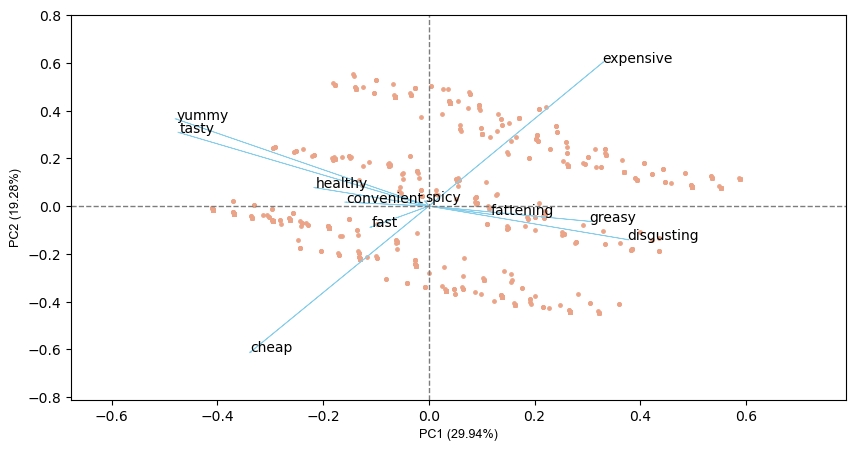

In [31]:
cluster.biplot(cscore=Principal_components, loadings=PCA_data1.components_, labels=data.columns.values, var1=round(PCA_data1.explained_variance_ratio_[0]*100, 2),
    var2=round(PCA_data1.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

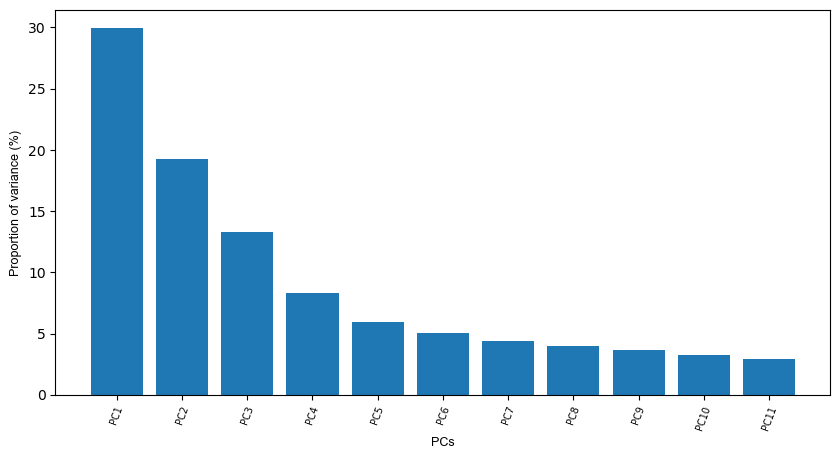

In [32]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[PC , var],show=True,dim=(10,5))

In [33]:
!pip install yellowbrick

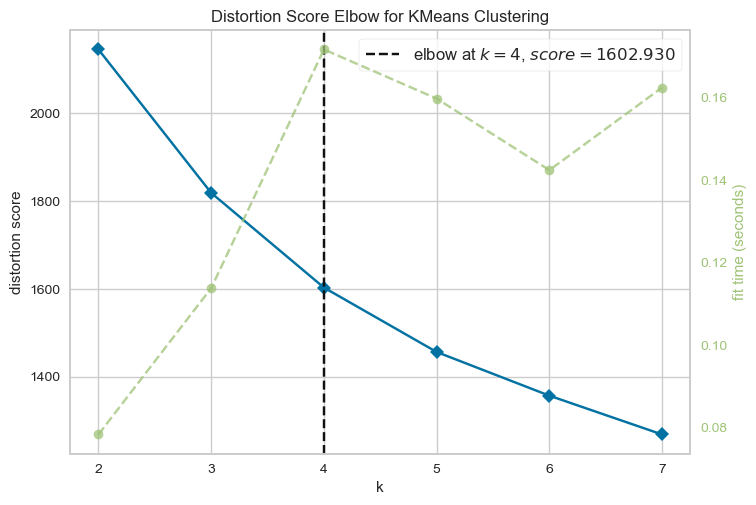

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,8)).fit(data1)
visualizer.show()

In [35]:
kmeans = KMeans(init="k-means++", n_clusters=4, n_init=10, max_iter=300, random_state=42 )

In [36]:
kmeans.fit(data1)

KMeans(n_clusters=4, random_state=42)

In [37]:
# The lowest SSE value
kmeans.inertia_

1603.060444055892

In [38]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[0.88793103, 0.98103448, 0.0862069 , 0.79482759, 0.32931034,
        0.96034483, 0.92241379, 0.97586207, 0.01724138, 0.32068966,
        0.04310345],
       [0.0203252 , 0.68292683, 0.08536585, 0.91463415, 0.69512195,
        0.73170732, 0.06504065, 0.08943089, 0.87804878, 0.06097561,
        0.71544715],
       [0.85448916, 0.9628483 , 0.13312693, 0.90712074, 0.61919505,
        0.86068111, 0.10835913, 0.93188854, 0.89783282, 0.20433437,
        0.10526316],
       [0.02302632, 0.89144737, 0.07236842, 0.92434211, 0.66776316,
        0.96381579, 0.93421053, 0.15460526, 0.01315789, 0.07236842,
        0.38815789]])

In [39]:
# The number of iterations required to converge
kmeans.n_iter_

7

In [40]:
kmeans.labels_

array([3, 2, 2, ..., 2, 0, 1])

In [41]:
from collections import Counter
Counter(kmeans.labels_)

Counter({3: 304, 2: 323, 0: 580, 1: 246})

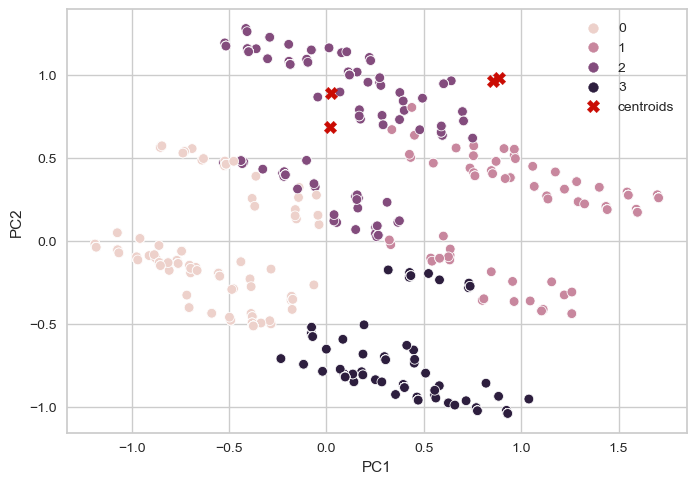

In [42]:
sns.scatterplot(data=Principal_components_df, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

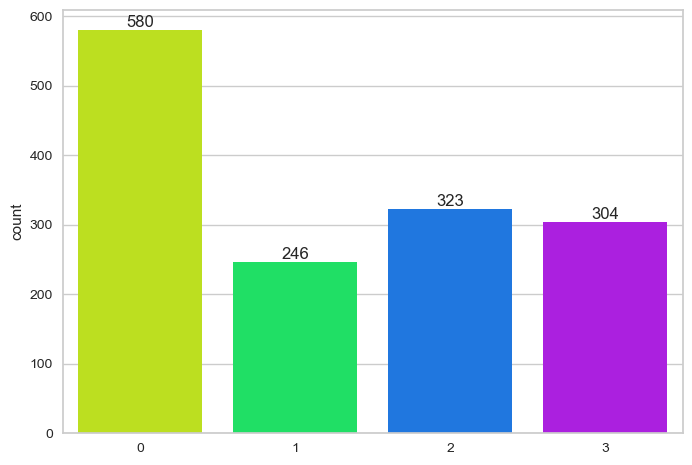

In [43]:
f = sns.countplot(x=kmeans.labels_ , palette='hsv')
f.bar_label(f.containers[0])
plt.rcParams['figure.figsize'] = (25, 8)
# print(len(dataset['cluster_num'][1]))

In [53]:
data['Like']= data['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

In [55]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(kmeans.labels_,data['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
row_0,,,,,,,,,,,
0,4,4,2,6,13,43,65,90,143,111,99
1,89,28,30,19,13,39,14,6,8,0,0
2,5,3,7,6,7,36,42,60,66,47,44
3,54,36,34,28,25,51,31,31,12,2,0


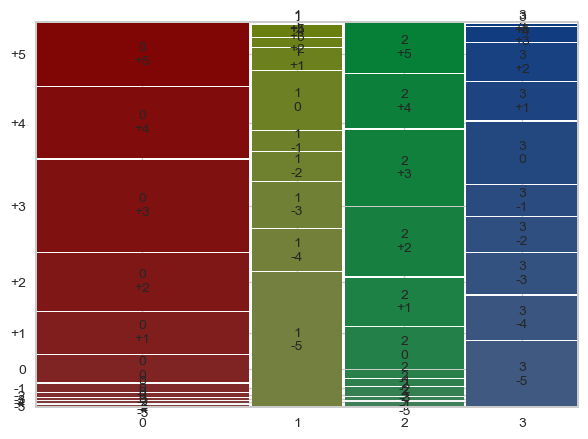

In [56]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [58]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(kmeans.labels_,data['Gender'])
crosstab_gender

Gender,Female,Male
row_0,,
0,349,231
1,106,140
2,154,169
3,179,125


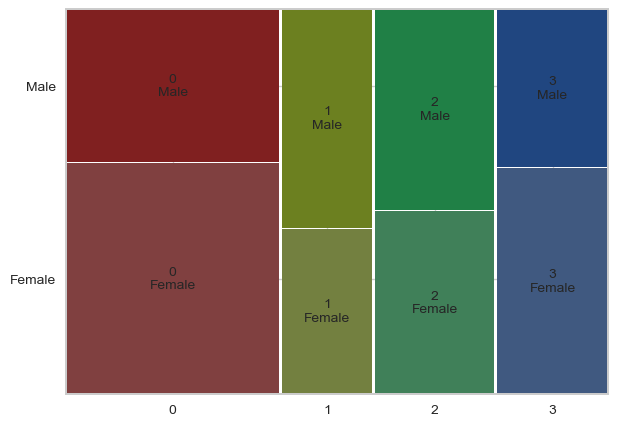

In [59]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<AxesSubplot:ylabel='Age'>

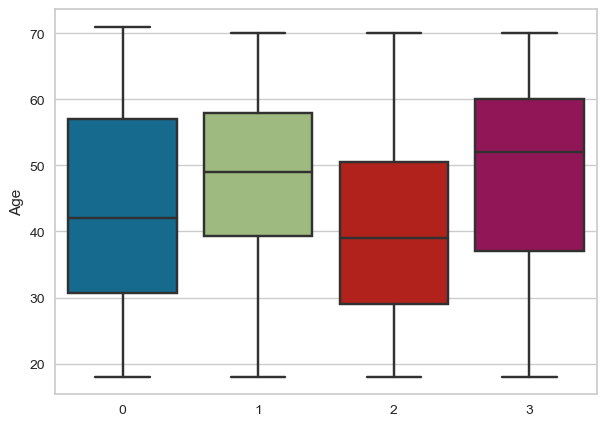

In [64]:
sns.boxplot(x=kmeans.labels_, y="Age", data=data)

In [68]:
from sklearn.preprocessing import LabelEncoder
#Calculating the mean
#Visit frequency
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby(kmeans.labels_)['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,index,VisitFrequency
0,0,2.584483
1,1,2.654472
2,2,2.547988
3,3,2.822368


In [70]:
#Like
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby(kmeans.labels_)['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,index,Like
0,0,2.962069
1,1,7.422764
2,2,3.275542
3,3,6.171053


In [72]:
#Gender
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby(kmeans.labels_)['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,index,Gender
0,0,0.398276
1,1,0.569106
2,2,0.523220
3,3,0.411184
